In [1]:
### Create Heatmap Type visualization of college hockey score bingo data

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from dateutil.relativedelta import relativedelta

# Read in the data using os join


# data = pd.read_csv(os.path.join('..', 'TEMP', '2022.csv'))

# Loads 2002-2022 data
# data = pd.read_csv(os.path.join('..', 'data', 'year_over_year', 'results_table_2002_2022_new.csv'))

# Loads Pre 2002 data
data = pd.read_csv(os.path.join('..', 'data', 'results_table_all_time.csv'))

# make sure Date is a datetime object
data['Date'] = pd.to_datetime(data['Date'])

# ######## TARGET SINGLE SEASON #########
# ## APPLY A YEAR FILTER IF NECESSARY FOR THE LARGER DATASET
# target_season = 1997
# # make sure Date is a datetime object
# data['Date'] = pd.to_datetime(data['Date'])
# # Filter data for a single season - season starts on august 1 of the year, ends on july 30 of the following year
# start_date = pd.to_datetime(f'{target_season}-08-01')
# end_date = pd.to_datetime(f'{target_season+1}-07-30')
# data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]


###################################
# Filter data for a range of years
###################################
start_season = 1940
end_season = 1960

# Set the range and filter - adjust to refelect seasons 
# starting on august 1 of the year, end season should be 
# adjusted to july,30 of following year
start_date = pd.to_datetime(f'{start_season}-08-01')
end_date = pd.to_datetime(f'{end_season+1}-07-30')
data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]



# Filter out exhibition games
filtered_data = data[data['Conference'] != 'Exhibition']

# Determine the maximum scores for both home and away teams to set up the axes
# and make sure they are integers
max_home_score = filtered_data['Home_Score'].max()
max_away_score = filtered_data['Away_Score'].max()
max_home_score, max_away_score = int(max_home_score), int(max_away_score)


# Create a pivot table to aggregate game counts for each score combination
score_combinations = pd.pivot_table(filtered_data, index='Home_Score', columns='Away_Score', values='Date', aggfunc='count', fill_value=0)

# Fill in any missing score combinations with zeros (in case some scores don't appear in the dataset)
all_scores = np.arange(0, max(max_home_score, max_away_score) + 1)  # +1 to include the max score itself
score_combinations = score_combinations.reindex(index=all_scores, columns=all_scores, fill_value=0)
# Make sure the numbers in the headers pivot table are integers
score_combinations = score_combinations.astype(int)
# score_combinations

data.head()

,Date,Conference,Home_Team,Home_Team_Link,Home_Score,Away_Team,Away_Team_Link,Away_Score,OT,Game_Notes,Game_ID,Day,Season_Year
2368,1941-02-15,CCHA,Dartmouth,/reports/team/Dartmouth/19,2,Yale,/reports/team/Yale/59,5,NaN,NaN,1941-02-15_Dartmouth_Yale,Saturday,1940
2369,1941-02-15,Ivy League,Harvard,/reports/team/Harvard/22,4,Princeton,/reports/team/Princeton/45,5,NaN,NaN,1941-02-15_Harvard_Princeton,Saturday,1940
2370,1941-02-15,Non-Conference,Boston University,/reports/team/Boston-University/10,2,Army,/reports/team/Army/6,2,ot,NaN,1941-02-15_Boston University_Army,Saturday,1940
2371,1941-02-15,Non-Conference,Illinois,NaN,2,Minnesota,/reports/team/Minnesota/34,6,NaN,NaN,1941-02-15_Illinois_Minnesota,Saturday,1940
2372,1941-02-15,Non-Conference,Paris A.C.,NaN,7,Michigan,/reports/team/Michigan/31,3,NaN,NaN,1941-02-15_Paris A.C._Michigan,Saturday,1940


### Heatmap Plotting Code


In [12]:
score_combinations

Away_Score,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
Home_Score,,,,,,,,,,,,,,,,,,,,,
0,3,10,11,11,30,24,20,17,12,8,...,2,2,0,2,0,0,0,0,0,0
1,3,9,51,56,46,59,48,34,28,18,...,3,0,1,0,0,1,0,0,0,0
2,6,34,23,81,63,68,66,54,38,24,...,1,2,0,0,0,0,0,0,0,0
3,9,32,77,23,101,71,53,44,27,16,...,3,1,0,0,0,0,0,0,0,1
4,14,41,67,82,24,78,55,31,24,15,...,0,2,0,0,1,0,0,0,0,0
5,13,38,45,61,61,12,41,21,18,13,...,0,0,0,0,0,0,0,0,0,0
6,16,32,43,41,49,38,7,14,9,12,...,0,0,0,0,0,0,0,0,0,0
7,12,13,36,21,22,20,14,3,6,5,...,1,0,0,0,0,0,0,0,0,0
8,10,15,21,12,20,14,7,3,3,1,...,1,0,0,0,0,0,0,0,0,0


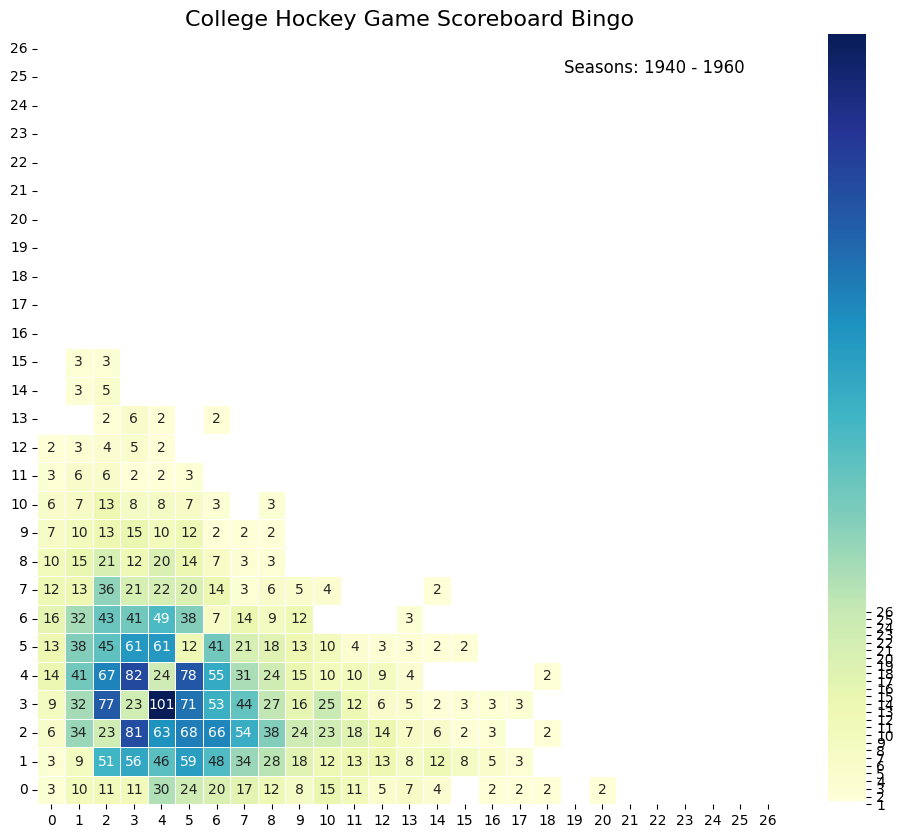

In [3]:
# Create a mask where the data is 0
mask = score_combinations == 0

# Customizing the colormap: add a transparent color for 0 values
# We take the original colormap, add a transparent color for 0 and keep the rest as is.
# This example uses "YlGnBu", but you can change it to your preferred colormap.
cmap = sns.color_palette("YlGnBu", as_cmap=True)
cmap_with_transparency = ListedColormap([(0,0,0,0)] + [cmap(i) for i in range(1, cmap.N)])

# Plotting the heatmap with modifications
plt.figure(figsize=(12, 10))
sns.heatmap(score_combinations, annot=True, mask=mask, cmap=cmap_with_transparency, fmt="d", linewidths=.5,
            cbar_kws={'ticks': range(1, max(max_home_score, max_away_score) + 1)})  # Adjust colorbar ticks if necessary
plt.title('College Hockey Game Scoreboard Bingo', fontsize=16)
# Add a note of the start and end dates - under the title in upper right of the plot
plt.text(0.95, 0.95, f'Seasons: {start_date.strftime("%Y")} - {(end_date - relativedelta(years=1)).strftime("%Y")}', ha='right', fontsize=12, transform=plt.gca().transAxes)
plt.xlabel('', fontsize=14) # Set to Blank to remove the label
plt.ylabel('', fontsize=14) # Set to Blank to remove the label
plt.xticks(np.arange(0.5, len(all_scores)+0.5, 1), all_scores)
plt.yticks(np.arange(0.5, len(all_scores)+0.5, 1), all_scores, rotation=0)

# Custom function to make text annotations transparent for 0 values
for text in plt.gca().texts:
    if text.get_text() == '0':
        text.set_alpha(0)


# Hide the right and top spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Invert y-axis so 0 is at the bottom
plt.gca().invert_yaxis()




## Set Hard Coded axis ranges
# plt.xlim(0, 15)
# plt.ylim(0, 15)




plt.show()


## OUTPUT HEATMAP

In [4]:
plt.show()

In [5]:
len(filtered_data)

# filtered_data.head()

3239

In [6]:
# import pandas as pd
# import numpy as np
# import os
# import matplotlib.pyplot as plt
# import seaborn as sns


# # Independent maximum scores for axes
# max_home_score = filtered_data['Home_Score'].max()
# max_away_score = filtered_data['Away_Score'].max()

# # Creating a pivot table for score combinations
# score_combinations = pd.pivot_table(filtered_data, index='Home_Score', columns='Away_Score', values='Date', aggfunc='count', fill_value=0)

# # Mask for zero values to apply transparency
# mask = score_combinations == 0

# # Plotting the heatmap with independent axis ranges and fixed transparency issue
# plt.figure(figsize=(12, 10))

# # Choose your color map here
# cmap_choice = "YlGnBu"  # Change this string to try other colormaps
# # YlGnBu, coolwarm, plasma, cividis, viridis, |||| inferno, magma, !twilight!, twilight_shifted, turbo, rocket, icefire

# sns.heatmap(score_combinations, annot=True, mask=mask, cmap=cmap_choice, fmt="d", linewidths=.5)
# plt.title('College Hockey Game Scoreboard Bingo', fontsize=16)
# # EMPTY AXIS LABELS
# plt.xlabel('', fontsize=14)
# plt.ylabel('', fontsize=14)

# # Setting the tick labels for x and y axes
# plt.xticks(np.arange(0.5, len(score_combinations.columns)+0.5, 1), score_combinations.columns, rotation=0, fontsize=14)
# plt.yticks(np.arange(0.5, len(score_combinations.index)+0.5, 1), score_combinations.index, rotation=0, fontsize=14)

# # Invert y-axis so 0 is at the bottom
# plt.gca().invert_yaxis()

# plt.show()


In [7]:



# # Plotting the heatmap
# plt.figure(figsize=(12, 10))
# sns.heatmap(score_combinations, annot=True, cmap="YlGnBu", fmt="d", linewidths=.5)
# plt.title('College Hockey Game Scoreboard Bingo', fontsize=16)
# plt.xlabel('Away Team Score', fontsize=14)
# plt.ylabel('Home Team Score', fontsize=14)
# plt.xticks(np.arange(0.5, len(all_scores)+0.5, 1), all_scores)
# plt.yticks(np.arange(0.5, len(all_scores)+0.5, 1), all_scores, rotation=0)
# plt.show()


In [8]:
filtered_data.shape

(3239, 13)

### Annimated heatmap

- not working currently. problem with the pagacke that writes the image/video 
- runs about 5 minutes at these setting sand fails at the wrote file portion presumably

In [9]:
# from matplotlib.animation import FuncAnimation

# # Ensure the data is sorted chronologically
# filtered_data = data[data['Conference'] != 'Exhibition'].copy()
# filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])
# filtered_data_sorted = filtered_data.sort_values('Date')

# # Define the function to update the heatmap for animation
# def update_heatmap(frame_number, data, all_scores, fig, ax):
#     ax.clear()  # Clear the previous heatmap
#     if frame_number == 0:  # Check if there is no data to plot
#         ax.text(0.5, 0.5, 'No data available', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
#         return

#     # Filter the data up to the current frame
#     temp_data = data.iloc[:frame_number]
#     score_combinations_temp = pd.pivot_table(temp_data, index='Home_Score', columns='Away_Score', values='Date', aggfunc='count', fill_value=0)
#     score_combinations_temp = score_combinations_temp.reindex(index=all_scores, columns=all_scores, fill_value=0)
#     sns.heatmap(score_combinations_temp, annot=True, cmap="YlGnBu", fmt="d", linewidths=.5, ax=ax, cbar=False)
#     ax.set_title('College Hockey Game Scoreboard Bingo\nUp to Date: ' + str(temp_data.iloc[-1]['Date'].date()), fontsize=16)
#     ax.set_xlabel('Away Team Score', fontsize=14)
#     ax.set_ylabel('Home Team Score', fontsize=14)
#     ax.set_xticklabels(all_scores)
#     ax.set_yticklabels(all_scores)

# # Set up the figure and axis for the animation
# fig, ax = plt.subplots(figsize=(12, 10))

# # Creating the animation
# anim = FuncAnimation(fig, update_heatmap, frames=len(filtered_data_sorted), fargs=(filtered_data_sorted, all_scores, fig, ax), interval=20, repeat=False)

# # # Save the animation
# anim_file = '../TEMP/college_hockey_scoreboard_animation.mov'
# anim.save(anim_file, writer='pillow', fps=10)

# anim_file


In [10]:
import ffmpeg

# !ffmpeg -version

In [11]:
# import ffmpeg
# # Save the animation
# anim_file = '../TEMP/college_hockey_scoreboard_animation.mpg'
# anim.save(anim_file, writer='ffmpeg', fps=10)

# anim_file